In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import datetime 
import time

%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.dates as mdates

# EDA
The data set has 3 different files and we will start analysing each of them

## Events CSV

This file contains events data, events that are performed on the site by users.

In [2]:
events_df = pd.read_csv('../input/ecommerce-dataset/events.csv')
events_df.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


In [50]:
events_df.timestamp = events_df.timestamp.apply(lambda x: datetime.datetime.fromtimestamp(x//1000.0) )

In [51]:
events_df.head()

,timestamp,visitorid,event,itemid,transactionid
0,2015-06-02 05:02:12,257597,view,355908,NaN
1,2015-06-02 05:50:14,992329,view,248676,NaN
2,2015-06-02 05:13:19,111016,view,318965,NaN
3,2015-06-02 05:12:35,483717,view,253185,NaN
4,2015-06-02 05:02:17,951259,view,367447,NaN


In [52]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   timestamp      datetime64[ns]
 1   visitorid      int64         
 2   event          object        
 3   itemid         int64         
 4   transactionid  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 105.1+ MB


In [53]:
events_df.describe()

,visitorid,itemid,transactionid
count,2.756101e+06,2.756101e+06,22457.000000
mean,7.019229e+05,2.349225e+05,8826.497796
std,4.056875e+05,1.341954e+05,5098.996290
min,0.000000e+00,3.000000e+00,0.000000
25%,3.505660e+05,1.181200e+05,4411.000000
50%,7.020600e+05,2.360670e+05,8813.000000
75%,1.053437e+06,3.507150e+05,13224.000000
max,1.407579e+06,4.668670e+05,17671.000000


We can see that transaction id has lot of NULLs. These events live viewing an item or adding to cart.

### Event

In [54]:
events_df.event.value_counts()

view           2664312
addtocart        69332
transaction      22457
Name: event, dtype: int64

### Unique Visitors

In [55]:
len(events_df.visitorid.unique())

1407580

### Transactions

In [56]:
len(events_df.transactionid.unique())

17673

Out of 22,457 transactions, 17,673 transactions are unique, that means that multiple items are transacted in one transaction.

### Items

In [57]:
len(events_df.itemid.unique())

235061

## Items CSV

In [58]:

item_1_df = pd.read_csv('../input/ecommerce-dataset/item_properties_part1.csv')
item_2_df = pd.read_csv('../input/ecommerce-dataset/item_properties_part2.csv')
items_df = pd.concat([item_1_df,item_2_df])
items_df.head()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


In [59]:
items_df.timestamp = items_df.timestamp.apply(lambda x: datetime.datetime.fromtimestamp(x//1000.0) )
items_df.head()

,timestamp,itemid,property,value
0,2015-06-28 03:00:00,460429,categoryid,1338
1,2015-09-06 03:00:00,206783,888,1116713 960601 n277.200
2,2015-08-09 03:00:00,395014,400,n552.000 639502 n720.000 424566
3,2015-05-10 03:00:00,59481,790,n15360.000
4,2015-05-17 03:00:00,156781,917,828513


In [60]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20275902 entries, 0 to 9275902
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   timestamp  datetime64[ns]
 1   itemid     int64         
 2   property   object        
 3   value      object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 773.5+ MB


In [61]:
items_df.describe()

,itemid
count,2.027590e+07
mean,2.333904e+05
std,1.348452e+05
min,0.000000e+00
25%,1.165160e+05
50%,2.334830e+05
75%,3.503040e+05
max,4.668660e+05


In [62]:
len(items_df.itemid.unique())

417053

Out of 417,053 , only 235,061 items had event on them.

In [63]:
max(items_df.itemid)

466866

This is not the number of items as some items might had got deleted.

In [64]:
items_df.property.value_counts()

888           3000398
790           1790516
available     1503639
categoryid     788214
6              631471
               ...   
472                 1
288                 1
769                 1
634                 1
1046                1
Name: property, Length: 1104, dtype: int64

## Category CSV

In [65]:
cat_df = pd.read_csv("../input/ecommerce-dataset/category_tree.csv")
cat_df.head()

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


In [66]:
cat_df.describe()

,categoryid,parentid
count,1669.000000,1644.000000
mean,849.285201,847.571168
std,490.195116,505.058485
min,0.000000,8.000000
25%,427.000000,381.000000
50%,848.000000,866.000000
75%,1273.000000,1291.000000
max,1698.000000,1698.000000


In [67]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1669 non-null   int64  
 1   parentid    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.2 KB


We can see that not all category have parent, 25 categories to be true. Hence, these might be parent. So we do not have a single parent in the data.

In [68]:
temp = cat_df.groupby('parentid')['categoryid'].count().sort_values(ascending=False).head(10).to_frame().reset_index()
temp['parentid'] = temp.parentid.astype('Int64').astype('str')
temp.head()

,parentid,categoryid
0,250,31
1,1009,22
2,362,22
3,351,19
4,1259,18


## Data Visualization

[Text(0, 0.5, 'Child Categories'),
 Text(0.5, 0, 'Category Id'),
 Text(0.5, 1.0, 'Top 10 Categories by Number of Children')]

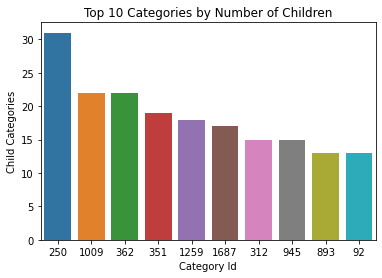

In [69]:
#color = sns.color_palette("crest")
ax = sns.barplot(x='parentid', y='categoryid', data=temp, order=temp.parentid)
ax.set(xlabel='Category Id', ylabel='Child Categories', title='Top 10 Categories by Number of Children')

In [70]:
#Top categories having items
temp = items_df[items_df.property == 'categoryid'].groupby('value').itemid.nunique().sort_values(ascending=False).to_frame().reset_index().head(10)
temp.head()

,value,itemid
0,342,17231
1,769,10982
2,173,10561
3,1301,10036
4,1007,9739


[Text(0, 0.5, 'Items in Category'),
 Text(0.5, 0, 'Category Id'),
 Text(0.5, 1.0, 'Top 10 Categories by Number of Items')]

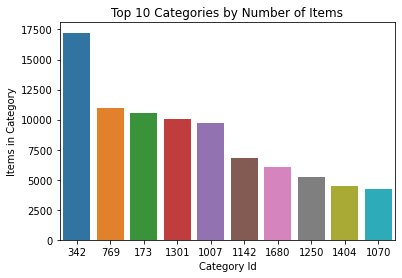

In [71]:
ax = sns.barplot(x='value', y='itemid', data=temp, order=temp.value)
ax.set(xlabel='Category Id', ylabel='Items in Category', title='Top 10 Categories by Number of Items')

[Text(0, 0.5, 'Number of Events'),
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Total Events in each Event Category')]

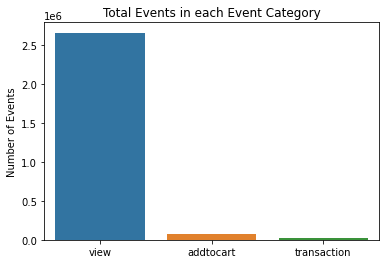

In [72]:
ax = sns.countplot(x='event', data=events_df)
ax.set(xlabel = '', ylabel='Number of Events', title='Total Events in each Event Category')

In [73]:
#Convert date to string
events_df['date'] = [d.date().isoformat() for d in events_df.timestamp]

# Count of visitors each day
temp = events_df.groupby('date').visitorid.count().to_frame().reset_index()
temp['date'] = pd.to_datetime(temp['date'])
temp.head()

,date,visitorid
0,2015-05-03,13683
1,2015-05-04,19414
2,2015-05-05,23015
3,2015-05-06,23920
4,2015-05-07,23164


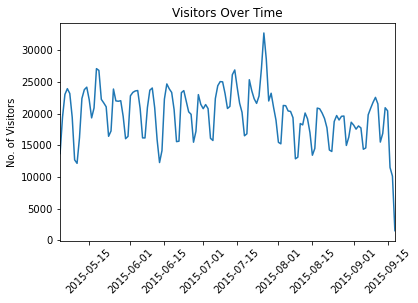

In [74]:
ax = sns.lineplot(x='date', y='visitorid', data=temp)
ax.set(xlabel="", 
       ylabel="No. of Visitors",
       title="Visitors Over Time")
ax.set_xlim(temp.iloc[0].date, temp.iloc[-1].date)
ax.tick_params(axis="x", rotation=45)

In [75]:
temp = events_df.groupby(['date','event']).visitorid.count().to_frame().reset_index()
#
temp['date'] = pd.to_datetime(temp['date'])
temp.head()

,date,event,visitorid
0,2015-05-03,addtocart,296
1,2015-05-03,transaction,83
2,2015-05-03,view,13304
3,2015-05-04,addtocart,579
4,2015-05-04,transaction,154


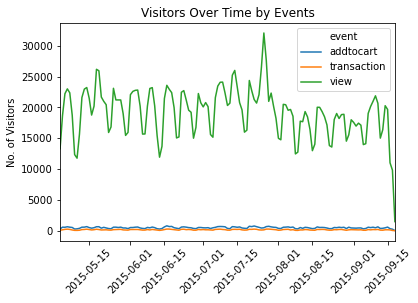

In [76]:
ax = sns.lineplot(x='date', y='visitorid', hue='event', data=temp)
ax.set(xlabel="", 
       ylabel="No. of Visitors",
       title="Visitors Over Time by Events")
ax.set_xlim(temp.iloc[0].date, temp.iloc[-1].date)
ax.tick_params(axis="x", rotation=45)

In [77]:
# Only visitors doing addtocart and transactions 
temp = events_df[events_df.event != 'view'].groupby(['date','event']).visitorid.count().to_frame().reset_index()
temp['date'] = pd.to_datetime(temp['date'])
temp.head()

,date,event,visitorid
0,2015-05-03,addtocart,296
1,2015-05-03,transaction,83
2,2015-05-04,addtocart,579
3,2015-05-04,transaction,154
4,2015-05-05,addtocart,565


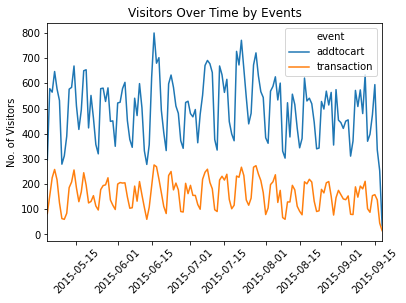

In [78]:
ax = sns.lineplot(x='date', y='visitorid', hue='event', data=temp)
ax.set(xlabel="", 
       ylabel="No. of Visitors",
       title="Visitors Over Time by Events")
ax.set_xlim(temp.iloc[0].date, temp.iloc[-1].date)
ax.tick_params(axis="x", rotation=45)

In [79]:
#piviting events
temp_pivot = temp.pivot(index='date', columns='event', values='visitorid').reset_index()
temp_pivot.head()

event,date,addtocart,transaction
0,2015-05-03,296,83
1,2015-05-04,579,154
2,2015-05-05,565,225
3,2015-05-06,647,258
4,2015-05-07,578,217


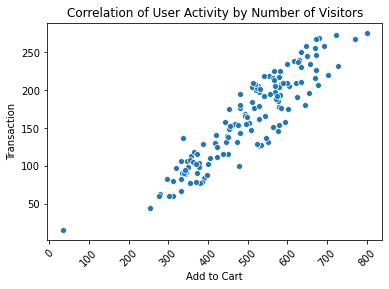

In [80]:
ax = sns.scatterplot(x='addtocart', y='transaction', data=temp_pivot)
ax.set(xlabel="Add to Cart", 
       ylabel="Transaction",
       title="Correlation of User Activity by Number of Visitors")
ax.tick_params(axis="x", rotation=45)

In [81]:
temp = events_df.groupby(['date','event']).visitorid.count().to_frame().reset_index()
#
temp['date'] = pd.to_datetime(temp['date'])
#temp.head()
temp_pivot = temp.pivot(index='date', columns='event', values='visitorid').reset_index()
temp_pivot.head()

event,date,addtocart,transaction,view
0,2015-05-03,296,83,13304
1,2015-05-04,579,154,18681
2,2015-05-05,565,225,22225
3,2015-05-06,647,258,23015
4,2015-05-07,578,217,22369


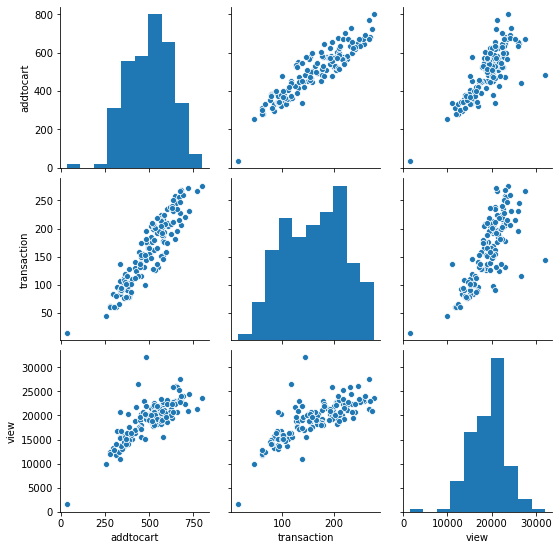

In [82]:
sns.pairplot(temp_pivot)

In [83]:
corr = temp_pivot.corr()
corr

event,addtocart,transaction,view
event,,,
addtocart,1.000000,0.914893,0.801022
transaction,0.914893,1.000000,0.768710
view,0.801022,0.768710,1.000000


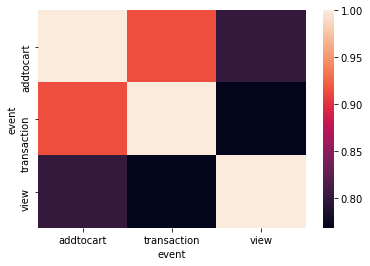

In [84]:
sns.heatmap(corr)

This notebook shows the basic EDA and Visualizations on the dataset.

Thank you!

# Association of Items

In [16]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [3]:
# Firstly let's create an array that lists visitors who made a purchase
customer_purchased = events_df[events_df.transactionid.notnull()].visitorid.unique()
    
purchased_items = []
buyer = []
    
# Create another list that contains all their purchases 
for customer in customer_purchased:

    #Generate a Pandas series type object containing all the visitor's purchases and put them in the list
    #buyer.append(customer)
    purchased_items.append(list(events_df.loc[(events_df.visitorid == customer) & (events_df.transactionid.notnull())].itemid.values)) 

In [4]:
# Encoding Transactions and Items to Crosstab
te = TransactionEncoder()
te_ary = te.fit(purchased_items).transform(purchased_items)
df = pd.DataFrame(te_ary, columns=te.columns_)
df
df.shape

(11719, 12025)

Numer of transactions is 11,719 and items is 12025.

In [8]:
frq_items = apriori(df, min_support=0.001, use_colnames=True)
frq_items.shape

,support,itemsets
0,0.001707,(546)
1,0.003925,(7943)
2,0.001792,(9877)
3,0.001451,(10572)
4,0.001024,(12217)
...,...,...
62,0.001195,(448453)
63,0.001877,(450082)
64,0.001109,(460553)
65,0.011008,(461686)


In [9]:
frq_items.sort_values(['support'], ascending=False)

,support,itemsets
65,0.011008,(461686)
24,0.006827,(213834)
1,0.003925,(7943)
61,0.003584,(445351)
15,0.003584,(119736)
...,...,...
13,0.001024,(80858)
44,0.001024,(324290)
28,0.001024,(231482)
26,0.001024,(219512)


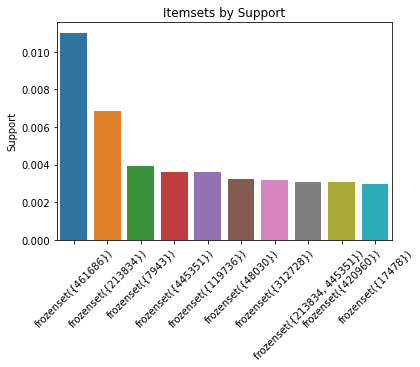

In [41]:
temp = frq_items.sort_values(['support'], ascending=False)
ax = sns.barplot(x='itemsets', y='support', data=temp.head(10))
ax.set(xlabel="", 
       ylabel="Support",
       title="Itemsets by Support")
ax.tick_params(axis="x", rotation=45)

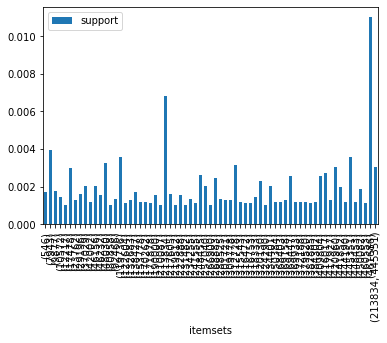

In [10]:
frq_items_indexed = frq_items.set_index('itemsets')
frq_items_indexed.plot(kind='bar')

In [17]:
rules_ap = association_rules(frq_items, metric ="confidence", min_threshold = 0.01)
rules_ap

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(213834),(445351),0.006827,0.003584,0.003072,0.450000,125.560714,0.003047,1.811666
1,(445351),(213834),0.003584,0.006827,0.003072,0.857143,125.560714,0.003047,6.952214


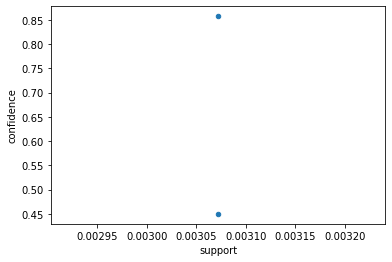

In [18]:
# Plotting support vs. confidence

rules_ap.plot.scatter(x='support',y='confidence')

In [19]:
rules_lift = association_rules(frq_items, metric="lift", min_threshold=2)
rules_lift = rules_ap.copy()
rules_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(213834),(445351),0.006827,0.003584,0.003072,0.450000,125.560714,0.003047,1.811666
1,(445351),(213834),0.003584,0.006827,0.003072,0.857143,125.560714,0.003047,6.952214


We can see that since association is low, hence confidence and lift both give same result.

## Frequent Patterns

In [20]:
from mlxtend.frequent_patterns import fpgrowth

frq_items_fp=fpgrowth(df, min_support=0.001, use_colnames=True)

print(frq_items_fp)

     support          itemsets
0   0.001365          (234255)
1   0.001365          (288525)
2   0.001195          (170262)
3   0.002987           (17478)
4   0.003925            (7943)
..       ...               ...
62  0.001536          (222888)
63  0.001280          (132683)
64  0.001195          (350384)
65  0.001109          (171878)
66  0.003072  (213834, 445351)

[67 rows x 2 columns]


In [21]:
rules_fp = association_rules(frq_items_fp, metric="confidence", min_threshold=0.01)
rules_fp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(213834),(445351),0.006827,0.003584,0.003072,0.450000,125.560714,0.003047,1.811666
1,(445351),(213834),0.003584,0.006827,0.003072,0.857143,125.560714,0.003047,6.952214


From the two above we see that both algorithms found identical association rules with same coefficients, just presented in a different order.

## Visualizing Rules using PyARMViz

In [22]:
!pip install --index-url https://test.pypi.org/simple/ PyARMViz

Looking in indexes: https://test.pypi.org/simple/


In [23]:
from PyARMViz import datasets
from PyARMViz import PyARMViz
from PyARMViz import Rule

In [24]:
rules = rules_lift
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(213834),(445351),0.006827,0.003584,0.003072,0.450000,125.560714,0.003047,1.811666
1,(445351),(213834),0.003584,0.006827,0.003072,0.857143,125.560714,0.003047,6.952214


In [25]:
def convert_rules_df_viz_rules(rules_df, num_trans):
    """
    Covert from the rules data frame from association rules to 
    rules list that can be visualized with PyARMViz package
    
    Parameters
    ----------
    
    rules_df: DataFrame
        The rules dataframe from association_rules method
    num_trans: int
        Number of transactions used to build association rules
    """
    rules_list = []
    rule_dict = {'lhs':(), 'rhs':(), 'count_full':(), 'count_lhs':(), 'count_rhs':(), 'num_transactions':()}
    for index, row in rules.iterrows():
        antec = tuple(row['antecedents'])
        conseq = list(row['consequents'])
        count_full = row['support']*num_trans
        count_lhs = row['antecedent support']*num_trans
        count_rhs = row['consequent support']*num_trans
        rule_dict['lhs']= antec
        rule_dict['rhs']= conseq
        rule_dict['count_full']= count_full
        rule_dict['count_lhs']= count_lhs
        rule_dict['count_rhs']= count_rhs
        rule_dict['num_transactions'] = num_trans
        rules_list.append(Rule.generate_rule_from_dict(rule_dict))

    return rules_list

In [26]:
# Number of transactions from the original dataset
num_trans = rules_fp.shape[0] 
rules_list = convert_rules_df_viz_rules(rules, num_trans)

In [27]:
rules_list

[{213834} -> {445351}, {445351} -> {213834}]

In [28]:
fig = PyARMViz.generate_rule_strength_plot(rules_list, allow_compound_flag=True)

In [29]:
fig = PyARMViz.generate_rule_start_end_plot(rules_list)

## Summary
- 